In [1]:
 %matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

In [2]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

Voici l'explication des colonnes donnée [sur le site d'origine](http://www.sentiweb.fr/france/fr/?page=json&file=csv-schema-v1&type=csv)


|Name	|Type	|Description
|--- | --- | --:
|week PK	|integer		|ISO8601 Yearweek number as numeric (year*100 + week nubmer)
|geo_insee PK	|string		|Identifier of the geographic area, from INSEE https://www.insee.fr
|geo_name	|string		|Geographic label of the area, corresponding to INSEE code. This label is not an id and is only provided for human reading
|indicator PK	|integer	|	Unique identifier of the indicator, see metadata document https://www.sentiweb.fr/meta.json
|inc	|integer		|Estimated incidence value for the time step, in the geographic level
|inc_low	|integer		|Lower bound of the estimated incidence 95% Confidence Interval
|inc_up	|integer		|Upper bound of the estimated incidence 95% Confidence Interval
|inc100	|integer		|Estimated rate incidence per 100,000 inhabitants
|inc100_low	|integer	|	Lower bound of the estimated incidence 95% Confidence Interval
|inc100_up	|integer	|	Upper bound of the estimated rate incidence 95% Confidence Interval

Missing value : -

Le code ci-dessous est exécuté **une seule fois** afin de créer *localement* le fichier de données.

In [4]:
raw_data = pd.read_csv(data_url, skiprows=1)
raw_data
raw_data.to_csv('incidence-PAY-7.csv', header = True)

Les lignes ci-dessus sont maintenant mises en commentaires et remplacées par le code ci-dessous, où on va récupérer en priorité les données localement, si elles sont disponibles, sinon sur le site du *réseau Sentinelle*.

In [5]:
import os
if os.path.isfile('incidence-PAY-7.csv'):
    raw_data = pd.read_csv('incidence-PAY-7.csv')
    print('existe')
else:
    print("n'existe pas")
    raw_data = pd.read_csv(data_url, skiprows = 1)
len(raw_data)
raw_data[:10]

existe


Unnamed: 0    week  indicator   inc  inc_low  inc_up  inc100  inc100_low  \
0           0  202050          7  8018     5001   11035      12           7   
1           1  202049          7  5100     3191    7009       8           5   
2           2  202048          7  6683     4312    9054      10           6   
3           3  202047          7  4999     2963    7035       8           5   
4           4  202046          7  3752     1963    5541       6           3   
5           5  202045          7  3696     2016    5376       6           3   
6           6  202044          7  4391     2375    6407       7           4   
7           7  202043          7  4376     2505    6247       7           4   
8           8  202042          7  4000     1979    6021       6           3   
9           9  202041          7  3961     2099    5823       6           3   

   inc100_up geo_insee geo_name  
0         17        FR   France  
1         11        FR   France  
2         14        FR   France  
3         11        FR   France  
4          9        FR   France  
5          9        FR   France  
6         10        FR   France  
7         10        FR   France  
8          9        FR   France  
9          9        FR   France

Recherche des points manquants dans le jeu de données.

In [6]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [Unnamed: 0, week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Il semble qu'il n'y ait aucun point manquant dans les données. Je garde la même convention que pour la grippe, en copiant les données dans la variable _data_

In [7]:
data = raw_data.copy()
data

Unnamed: 0    week  indicator    inc  inc_low  inc_up  inc100  \
0              0  202050          7   8018     5001   11035      12   
1              1  202049          7   5100     3191    7009       8   
2              2  202048          7   6683     4312    9054      10   
3              3  202047          7   4999     2963    7035       8   
4              4  202046          7   3752     1963    5541       6   
5              5  202045          7   3696     2016    5376       6   
6              6  202044          7   4391     2375    6407       7   
7              7  202043          7   4376     2505    6247       7   
8              8  202042          7   4000     1979    6021       6   
9              9  202041          7   3961     2099    5823       6   
10            10  202040          7   2078      675    3481       3   
11            11  202039          7   1049      237    1861       2   
12            12  202038          7   2253      782    3724       3   
13            13  202037          7   1584      405    2763       2   
14            14  202036          7    919      100    1738       1   
15            15  202035          7    828        0    1694       1   
16            16  202034          7   2272      371    4173       3   
17            17  202033          7   1284      177    2391       2   
18            18  202032          7   2650      689    4611       4   
19            19  202031          7   1303      100    2506       2   
20            20  202030          7   1385       75    2695       2   
21            21  202029          7    841       10    1672       1   
22            22  202028          7    728        0    1515       1   
23            23  202027          7    986      149    1823       1   
24            24  202026          7    694        0    1454       1   
25            25  202025          7    228        0     597       0   
26            26  202024          7    388        0     959       1   
27            27  202023          7    558        1    1115       1   
28            28  202022          7    277        0     633       0   
29            29  202021          7    602       36    1168       1   
...          ...     ...        ...    ...      ...     ...     ...   
1537        1537  199126          7  17608    11304   23912      31   
1538        1538  199125          7  16169    10700   21638      28   
1539        1539  199124          7  16171    10071   22271      28   
1540        1540  199123          7  11947     7671   16223      21   
1541        1541  199122          7  15452     9953   20951      27   
1542        1542  199121          7  14903     8975   20831      26   
1543        1543  199120          7  19053    12742   25364      34   
1544        1544  199119          7  16739    11246   22232      29   
1545        1545  199118          7  21385    13882   28888      38   
1546        1546  199117          7  13462     8877   18047      24   
1547        1547  199116          7  14857    10068   19646      26   
1548        1548  199115          7  13975     9781   18169      25   
1549        1549  199114          7  12265     7684   16846      22   
1550        1550  199113          7   9567     6041   13093      17   
1551        1551  199112          7  10864     7331   14397      19   
1552        1552  199111          7  15574    11184   19964      27   
1553        1553  199110          7  16643    11372   21914      29   
1554        1554  199109          7  13741     8780   18702      24   
1555        1555  199108          7  13289     8813   17765      23   
1556        1556  199107          7  12337     8077   16597      22   
1557        1557  199106          7  10877     7013   14741      19   
1558        1558  199105          7  10442     6544   14340      18   
1559        1559  199104          7   7913     4563   11263      14   
1560        1560  199103          7  15387    10484   20290      27   
1561        1561  199102      

Fonction de conversion de la notation *yyyyww* pour la date en année et semaine séparés.

In [8]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

Définition des périodes d'observation comme nouvel index des données, et tri par période, chronologiquement, pour en faciliter l'étude.

In [9]:
sorted_data = data.set_index('period').sort_index()

Vérification qu'il n'y a pas de trou dans les données, en laissant une marge d'erreur d'une seconde.

In [10]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Pas de résultat au calcul ci-dessous. Donc les données sont complètes.

Visualisation des données :

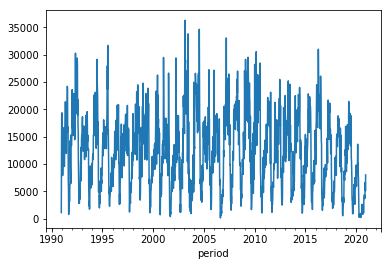

In [11]:
sorted_data['inc'].plot()

Zoom sur les dernières années pour mieux voir la périodicité.

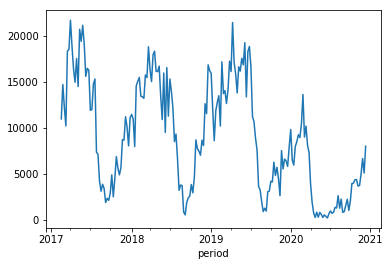

In [12]:
sorted_data['inc'][-200:].plot()

Le minimum a l'air d'être autour de septembre (vers la fin du 3ème trimestre). Du coup, on choisit le **1$^er$ septembre** comme début d'année pour empiler les données.

In [13]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1990,
                                    sorted_data.index[-1].year)]

On se protège contre le changement du nombre de semaines par an et calcul du ombre d'incidences hebdomadaires.

In [19]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
#    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

N'étant pas familier avec la commande **assert**, je ne sais pas interprêter l'erreur ci-dessus. Je continue, et y reviendrai éventuellement...
Il semble que le problème vienne de la commande. Elle est donc mise en commentaire.

Tracé des incidences annuelles :

29


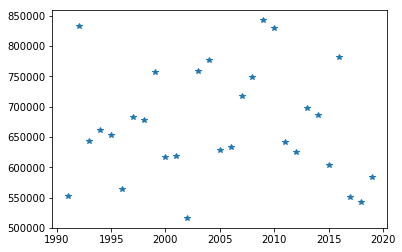

In [21]:
print(len(yearly_incidence))
yearly_incidence.plot(style='*')

In [22]:
print(min(yearly_incidence), max(yearly_incidence))

516689 842373
